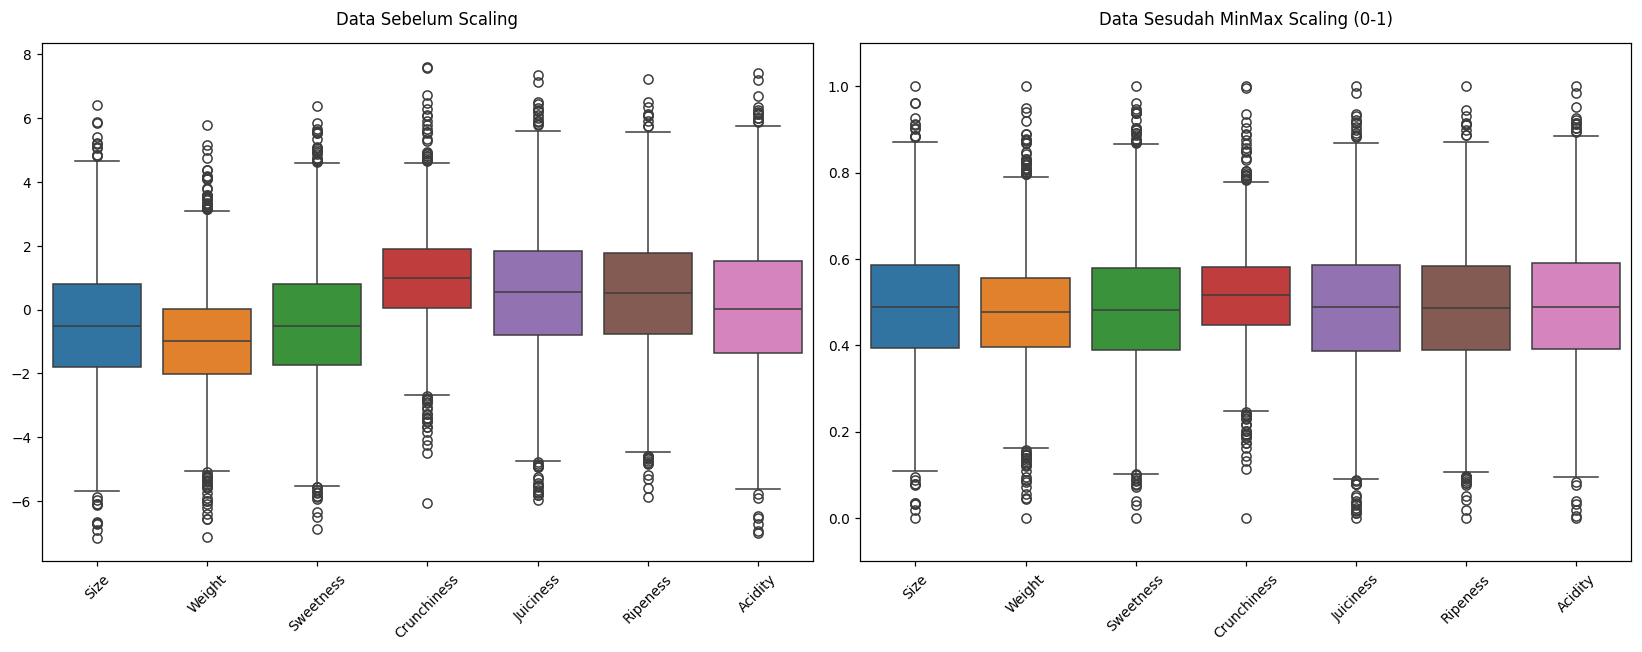

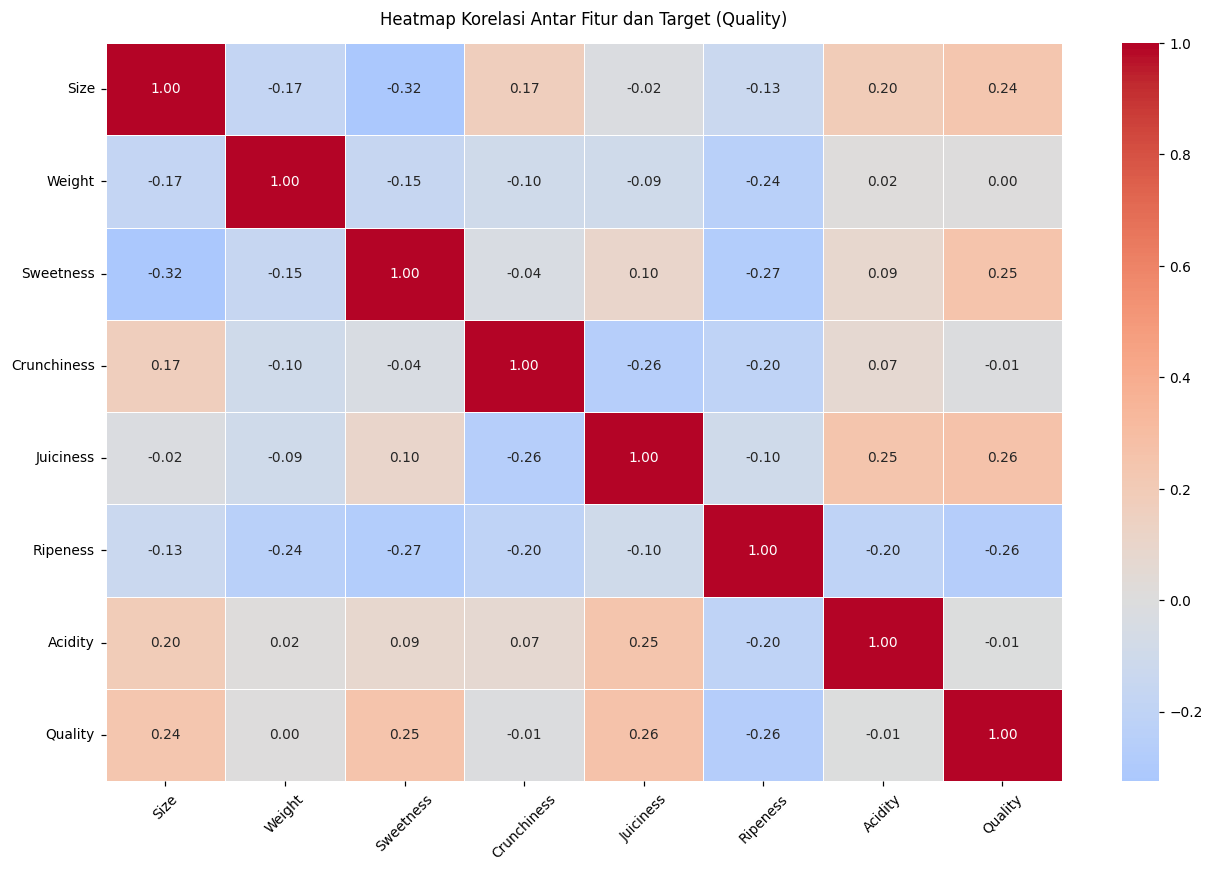


Korelasi Fitur dengan Quality:
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64


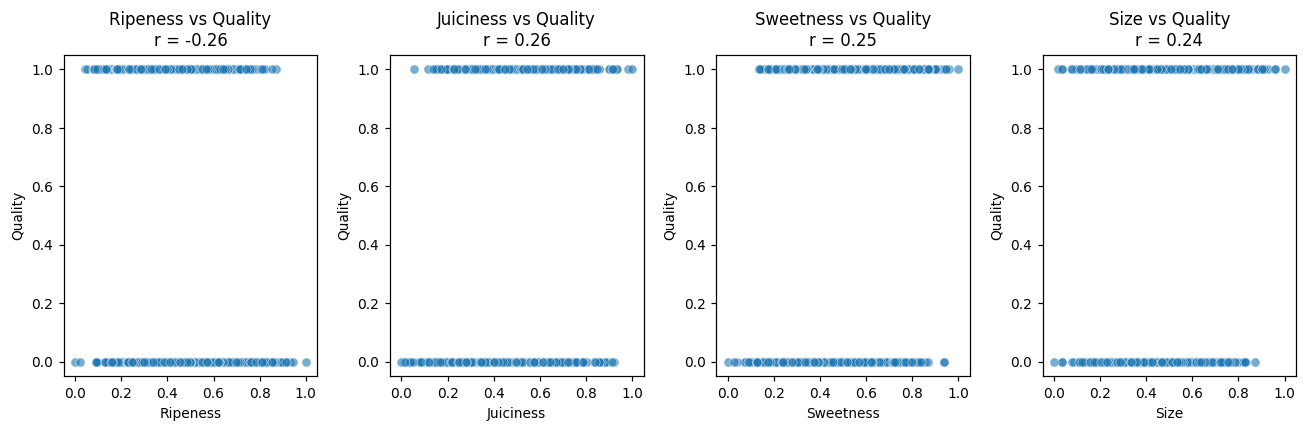

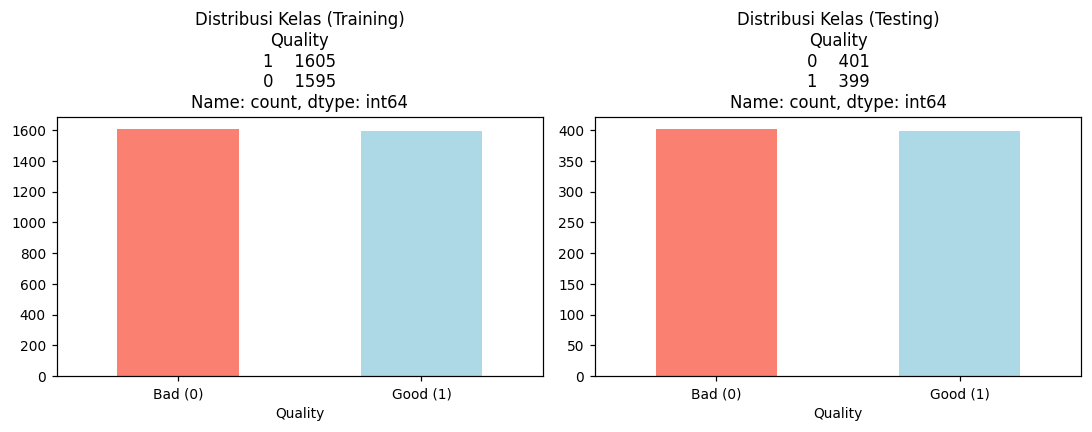

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Load dan Preprocessing Data
df = pd.read_csv('apple_quality.csv')

# Hapus kolom tidak penting
df = df.drop(columns=['A_id'])

# Konversi Quality ke numerik
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

# Handle missing values
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.median())

# Pisahkan fitur dan label
X = df.drop(columns=['Quality'])
y = df['Quality']

# 2. MinMax Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 4. Visualisasi Before-After Scaling
plt.figure(figsize=(15, 6))

# Before Scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title('Data Sebelum Scaling', pad=12)
plt.xticks(rotation=45)

# After Scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_scaled)
plt.title('Data Sesudah MinMax Scaling (0-1)', pad=12)
plt.xticks(rotation=45)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

# 5. Visualisasi Korelasi Fitur
plt.figure(figsize=(12, 8))

# Hitung korelasi
corr_matrix = pd.concat([X_scaled, y], axis=1).corr()

# Heatmap korelasi
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, linewidths=0.5, annot_kws={"size": 9})
plt.title('Heatmap Korelasi Antar Fitur dan Target (Quality)', pad=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Korelasi dengan Target (Quality)
quality_corr = corr_matrix['Quality'].sort_values(ascending=False)[1:]
print("\nKorelasi Fitur dengan Quality:")
print(quality_corr)

# 7. Visualisasi Korelasi Teratas
top_features = quality_corr.abs().sort_values(ascending=False).index[:4]

plt.figure(figsize=(12, 4))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=pd.concat([X_scaled, y], axis=1), 
                   x=feature, y='Quality', alpha=0.6)
    plt.title(f'{feature} vs Quality\nr = {quality_corr[feature]:.2f}')
plt.tight_layout()
plt.show()

# 8. Distribusi Train-Test
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribusi Kelas (Training)\n' + str(y_train.value_counts()))
plt.xticks([0, 1], ['Bad (0)', 'Good (1)'], rotation=0)

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribusi Kelas (Testing)\n' + str(y_test.value_counts()))
plt.xticks([0, 1], ['Bad (0)', 'Good (1)'], rotation=0)

plt.tight_layout()
plt.show()

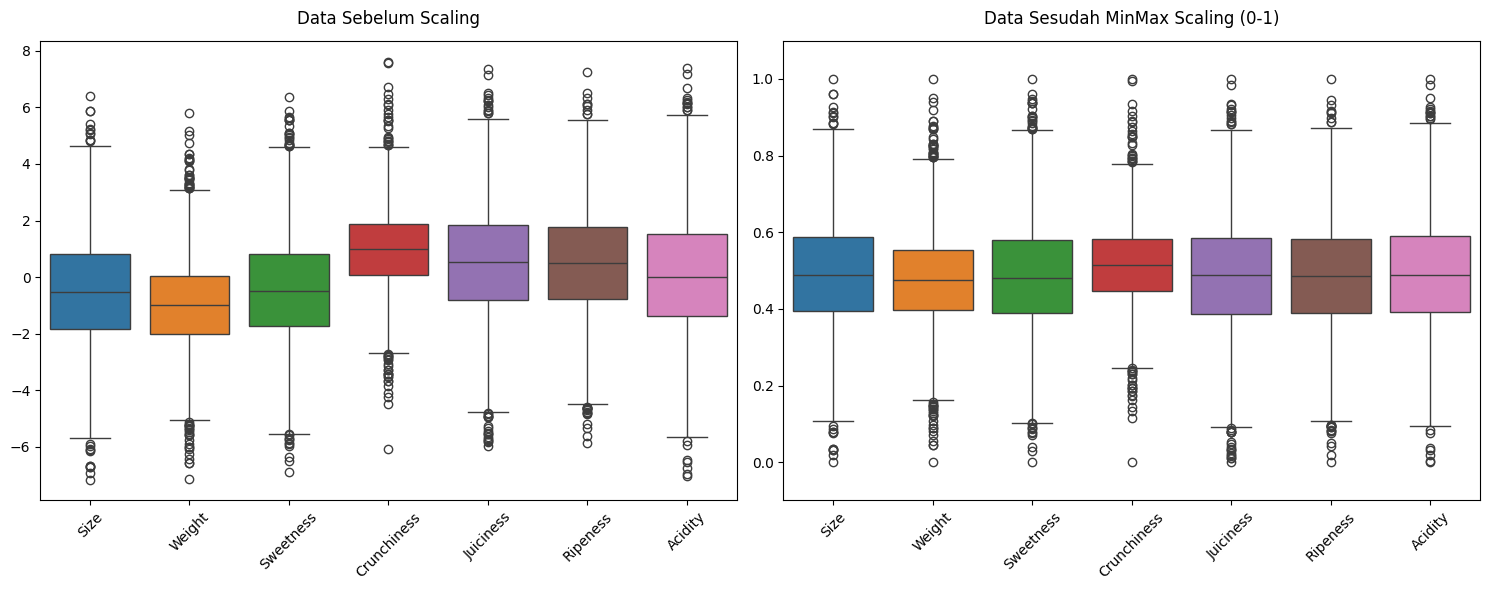

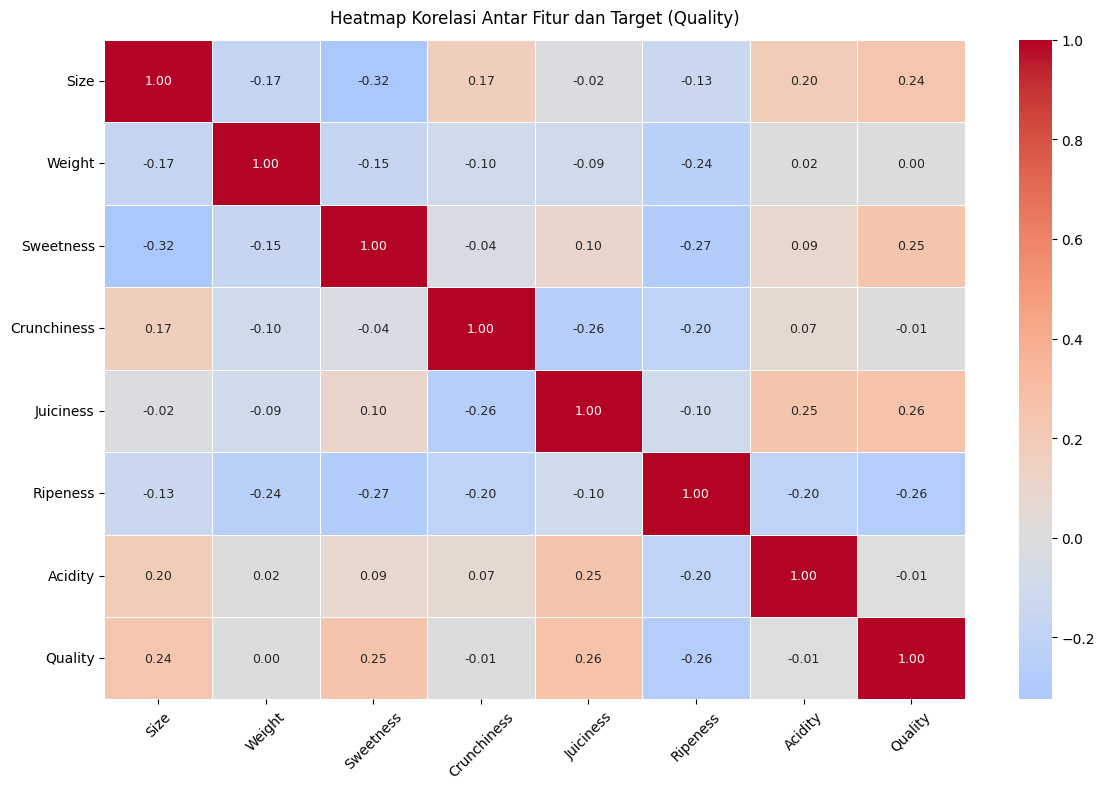


Korelasi Fitur dengan Quality:
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64


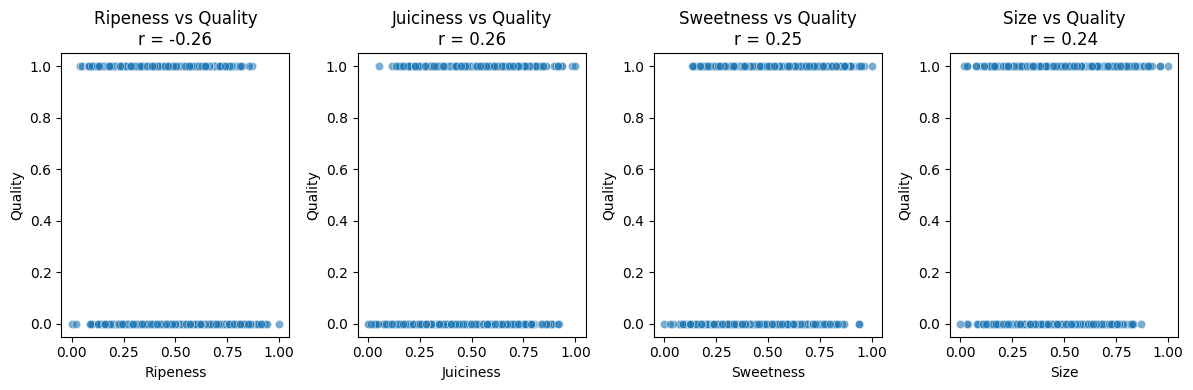

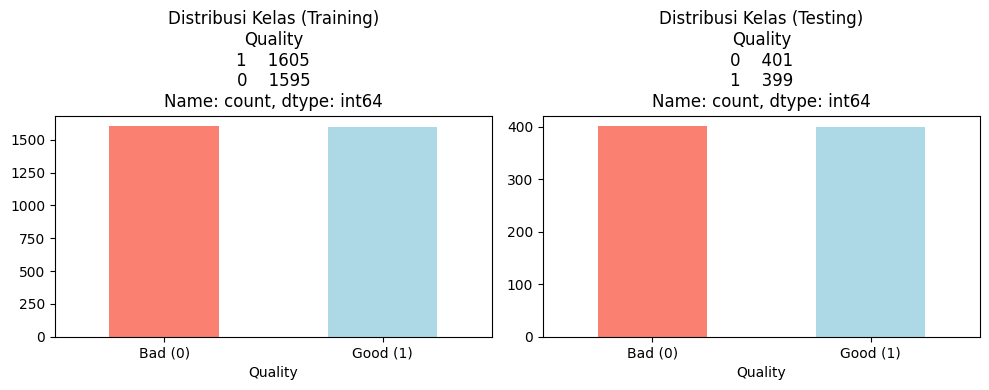


PERSIAPAN DATA UNTUK KNN MANUAL
Data training: 3200 sampel
Data testing: 800 sampel
Fitur yang digunakan: 7 fitur
Nama fitur: ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

MENCARI NILAI K TERBAIK
Testing berbagai nilai k...
k= 1: Accuracy = 0.9062
k= 2: Accuracy = 0.9062
k= 3: Accuracy = 0.8900
k= 4: Accuracy = 0.9012
k= 5: Accuracy = 0.8988
k= 6: Accuracy = 0.9075
k= 7: Accuracy = 0.9062
k= 8: Accuracy = 0.9062
k= 9: Accuracy = 0.9137
k=10: Accuracy = 0.9100
k=11: Accuracy = 0.9087
k=12: Accuracy = 0.9012
k=13: Accuracy = 0.9125
k=14: Accuracy = 0.9075
k=15: Accuracy = 0.9100
k=16: Accuracy = 0.9062
k=17: Accuracy = 0.9100
k=18: Accuracy = 0.9087
k=19: Accuracy = 0.9125
k=20: Accuracy = 0.9113

K terbaik: 9 dengan accuracy: 0.9137


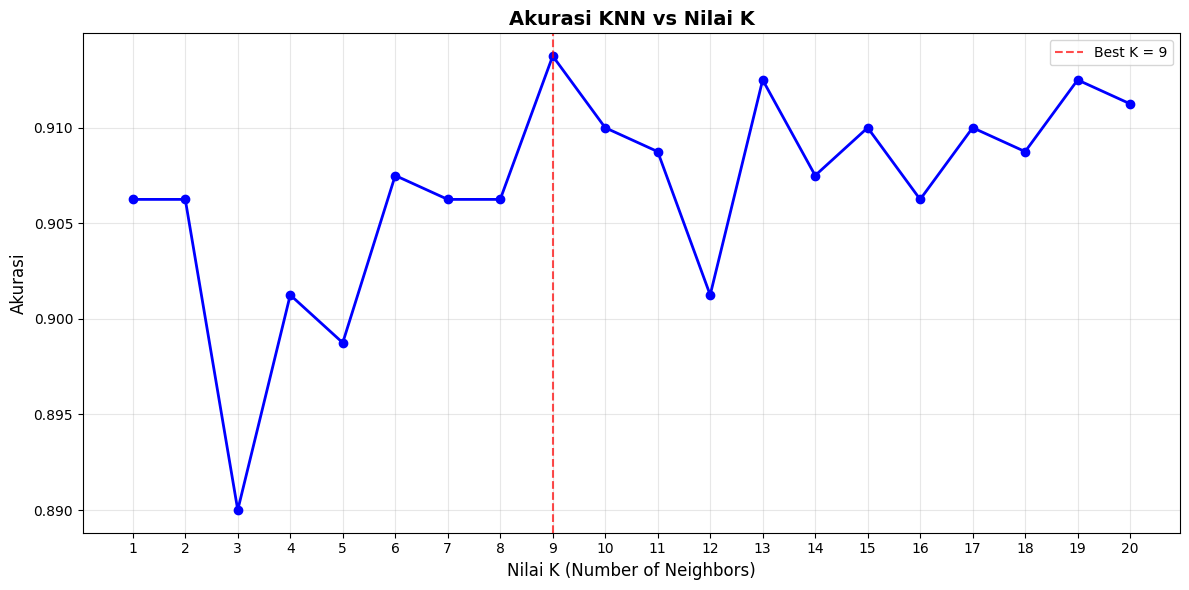


EVALUASI MODEL KNN FINAL (k=9)
Akurasi Final: 0.9137 (91.38%)

Confusion Matrix:
      Bad  Good
Bad   365    36
Good   33   366

Metrik Evaluasi:
Precision: 0.9104
Recall: 0.9173
F1-Score: 0.9139


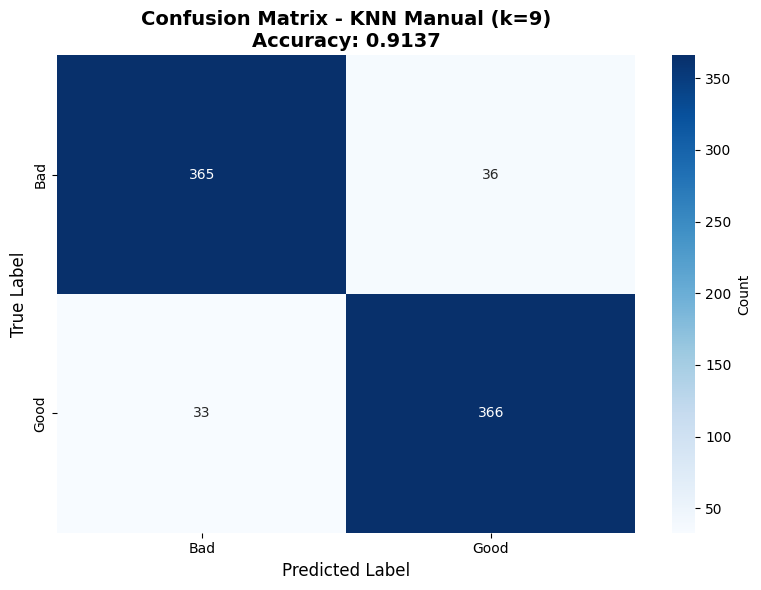


ANALISIS DETAIL PER KELAS
Distribusi Aktual vs Prediksi:
          Aktual  Prediksi
Bad (0)      401       398
Good (1)     399       402

Akurasi per Kelas:
Bad (0): 0.9102 (91.02%)
Good (1): 0.9173 (91.73%)

RINGKASAN HASIL ANALISIS KNN
Dataset: Apple Quality dengan 4000 sampel
Preprocessing: MinMax Scaling (0-1)
Split Data: 3200 training, 800 testing
K Optimal: 9
Akurasi Terbaik: 0.9137 (91.38%)
Fitur yang digunakan: 7 fitur
Metrik: Precision=0.910, Recall=0.917, F1=0.914
Metode: KNN Manual dengan Inverse Distance Weighting

Program selesai dijalankan!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math  # Tambahan untuk KNN manual

# 1. Load dan Preprocessing Data
df = pd.read_csv('apple_quality.csv')

# Hapus kolom tidak penting
df = df.drop(columns=['A_id'])

# Konversi Quality ke numerik
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

# Handle missing values
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.median())

# Pisahkan fitur dan label
X = df.drop(columns=['Quality'])
y = df['Quality']

# 2. MinMax Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 4. Visualisasi Before-After Scaling
plt.figure(figsize=(15, 6))

# Before Scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title('Data Sebelum Scaling', pad=12)
plt.xticks(rotation=45)

# After Scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_scaled)
plt.title('Data Sesudah MinMax Scaling (0-1)', pad=12)
plt.xticks(rotation=45)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

# 5. Visualisasi Korelasi Fitur
plt.figure(figsize=(12, 8))

# Hitung korelasi
corr_matrix = pd.concat([X_scaled, y], axis=1).corr()

# Heatmap korelasi
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, annot_kws={"size": 9})
plt.title('Heatmap Korelasi Antar Fitur dan Target (Quality)', pad=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Korelasi dengan Target (Quality)
quality_corr = corr_matrix['Quality'].sort_values(ascending=False)[1:]
print("\nKorelasi Fitur dengan Quality:")
print(quality_corr)

# 7. Visualisasi Korelasi Teratas
top_features = quality_corr.abs().sort_values(ascending=False).index[:4]

plt.figure(figsize=(12, 4))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=pd.concat([X_scaled, y], axis=1), x=feature, y='Quality', alpha=0.6)
    plt.title(f'{feature} vs Quality\nr = {quality_corr[feature]:.2f}')
plt.tight_layout()
plt.show()

# 8. Distribusi Train-Test
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribusi Kelas (Training)\n' + str(y_train.value_counts()))
plt.xticks([0, 1], ['Bad (0)', 'Good (1)'], rotation=0)

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribusi Kelas (Testing)\n' + str(y_test.value_counts()))
plt.xticks([0, 1], ['Bad (0)', 'Good (1)'], rotation=0)

plt.tight_layout()
plt.show()

# 9. Implementasi KNN Manual
def euclidean_distance(sample1, sample2, features):
    """Menghitung jarak euclidean antara dua sampel"""
    return math.sqrt(sum((sample1[feat] - sample2[feat]) ** 2 for feat in features))

def get_neighbors(train_data, test_sample, k, features):
    """Mendapatkan k tetangga terdekat"""
    distances = []
    for sample in train_data:
        dist = euclidean_distance(sample, test_sample, features)
        distances.append((sample, dist))
    distances.sort(key=lambda x: x[1])
    return distances[:k]

def predict_classification(train_data, test_sample, k, features):
    """Prediksi kelas untuk satu sampel dengan inverse distance weighting"""
    neighbors = get_neighbors(train_data, test_sample, k, features)
    class_votes = {}
    for neighbor, dist in neighbors:
        label = neighbor['label']
        weight = 1 / (dist + 1e-6)  # inverse distance weighting
        class_votes[label] = class_votes.get(label, 0) + weight
    return max(class_votes.items(), key=lambda x: x[1])[0]

# 10. Persiapan Data untuk KNN Manual
print("\n" + "="*50)
print("PERSIAPAN DATA UNTUK KNN MANUAL")
print("="*50)

# Convert ke format yang dibutuhkan KNN manual
features = list(X_train.columns)
train_data = []
for idx in range(len(X_train)):
    sample = dict(X_train.iloc[idx])
    sample['label'] = y_train.iloc[idx]
    train_data.append(sample)

test_data = []
for idx in range(len(X_test)):
    sample = dict(X_test.iloc[idx])
    sample['label'] = y_test.iloc[idx]
    test_data.append(sample)

print(f"Data training: {len(train_data)} sampel")
print(f"Data testing: {len(test_data)} sampel")
print(f"Fitur yang digunakan: {len(features)} fitur")
print(f"Nama fitur: {features}")

# 11. Mencari K Terbaik
print("\n" + "="*50)
print("MENCARI NILAI K TERBAIK")
print("="*50)

k_values = list(range(1, 21))
accuracies = []
best_k = 1
best_acc = 0

print("Testing berbagai nilai k...")
for k in k_values:
    correct = 0
    for sample in test_data:
        pred = predict_classification(train_data, sample, k, features)
        if pred == sample['label']:
            correct += 1
    
    acc = correct / len(test_data)
    accuracies.append(acc)
    
    print(f"k={k:2d}: Accuracy = {acc:.4f}")
    
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\nK terbaik: {best_k} dengan accuracy: {best_acc:.4f}")

# 12. Visualisasi K vs Accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue', linewidth=2, markersize=6)
plt.title('Akurasi KNN vs Nilai K', fontsize=14, fontweight='bold')
plt.xlabel('Nilai K (Number of Neighbors)', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Best K = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()

# 13. Evaluasi Model Final
print("\n" + "="*50)
print(f"EVALUASI MODEL KNN FINAL (k={best_k})")
print("="*50)

y_true = []
y_pred = []

for sample in test_data:
    y_true.append(sample['label'])
    pred = predict_classification(train_data, sample, best_k, features)
    y_pred.append(pred)

# Hitung akurasi final
final_accuracy = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i]]) / len(y_true)
print(f"Akurasi Final: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")

# 14. Confusion Matrix
print("\nConfusion Matrix:")
labels = sorted(set(y_true + y_pred))
label_names = ['Bad', 'Good']

conf_matrix = pd.DataFrame(0, index=label_names, columns=label_names)
for true, pred in zip(y_true, y_pred):
    true_label = 'Good' if true == 1 else 'Bad'
    pred_label = 'Good' if pred == 1 else 'Bad'
    conf_matrix.loc[true_label, pred_label] += 1

print(conf_matrix)

# Hitung metrik evaluasi
tp = conf_matrix.loc['Good', 'Good']
tn = conf_matrix.loc['Bad', 'Bad']  
fp = conf_matrix.loc['Bad', 'Good']
fn = conf_matrix.loc['Good', 'Bad']

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nMetrik Evaluasi:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# 15. Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - KNN Manual (k={best_k})\nAccuracy: {final_accuracy:.4f}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# 16. Analisis Detail per Kelas
print("\n" + "="*50)
print("ANALISIS DETAIL PER KELAS")
print("="*50)

# Distribusi prediksi
pred_counts = pd.Series(y_pred).value_counts().sort_index()
true_counts = pd.Series(y_true).value_counts().sort_index()

print("Distribusi Aktual vs Prediksi:")
comparison_df = pd.DataFrame({
    'Aktual': true_counts,
    'Prediksi': pred_counts
})
comparison_df.index = ['Bad (0)', 'Good (1)']
print(comparison_df)

# Akurasi per kelas
bad_indices = [i for i, val in enumerate(y_true) if val == 0]
good_indices = [i for i, val in enumerate(y_true) if val == 1]

bad_accuracy = sum([1 for i in bad_indices if y_true[i] == y_pred[i]]) / len(bad_indices) if bad_indices else 0
good_accuracy = sum([1 for i in good_indices if y_true[i] == y_pred[i]]) / len(good_indices) if good_indices else 0

print(f"\nAkurasi per Kelas:")
print(f"Bad (0): {bad_accuracy:.4f} ({bad_accuracy*100:.2f}%)")
print(f"Good (1): {good_accuracy:.4f} ({good_accuracy*100:.2f}%)")

# 17. Ringkasan Hasil
print("\n" + "="*60)
print("RINGKASAN HASIL ANALISIS KNN")
print("="*60)
print(f"Dataset: Apple Quality dengan {len(df)} sampel")
print(f"Preprocessing: MinMax Scaling (0-1)")
print(f"Split Data: {len(train_data)} training, {len(test_data)} testing")
print(f"K Optimal: {best_k}")
print(f"Akurasi Terbaik: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"Fitur yang digunakan: {len(features)} fitur")
print(f"Metrik: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1_score:.3f}")
print("Metode: KNN Manual dengan Inverse Distance Weighting")
print("="*60)

if __name__ == "__main__":
    print("\nProgram selesai dijalankan!")